<a href="https://colab.research.google.com/github/Imshyeon/2023_AI_BACKEND_AI/blob/master/Object%20Detection/YOLO/Yolo_v5_Mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Custom Data_Set

In [2]:
!wget https://raw.githubusercontent.com/rusita-ai/pyData/master/maskdataset_2C.zip

--2023-10-19 04:05:07--  https://raw.githubusercontent.com/rusita-ai/pyData/master/maskdataset_2C.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19667795 (19M) [application/zip]
Saving to: ‘maskdataset_2C.zip’

maskdataset_2C.zip  100%[===================>]  18.76M  --.-KB/s    in 0.1s    

2023-10-19 04:05:07 (162 MB/s) - ‘maskdataset_2C.zip’ saved [19667795/19667795]



In [3]:
!pwd

/content


In [4]:
!ls -l

total 19212
-rw-r--r-- 1 root root 19667795 Oct 19 04:05 maskdataset_2C.zip
drwxr-xr-x 1 root root     4096 Oct 17 13:25 sample_data


In [5]:
!unzip -q /content/maskdataset_2C.zip -d /content

# Train vs. Test Split

In [6]:
from glob import glob

img_list = glob('/content/dataset/images/*.jpg')

print(len(img_list))

100


In [8]:
from glob import glob

txt_list = glob('/content/dataset/images/*.txt')

print(len(txt_list))

100


In [9]:
!mkdir /content/dataset/labels

In [10]:
!ls -ld /content/dataset/labels

drwxr-xr-x 2 root root 4096 Oct 19 04:07 /content/dataset/labels


In [11]:
for a in txt_list:
  !mv {a} /content/dataset/labels

In [12]:
from glob import glob

img_list = glob('/content/dataset/images/*.jpg')
txt_list = glob('/content/dataset/labels/*.txt')

print(len(img_list))
print(len(txt_list))

100
100


In [13]:
from sklearn.model_selection import train_test_split

train_img_list, valid_img_list = train_test_split(img_list,
                                                  test_size = 0.2,
                                                  random_state=2045)

print(len(train_img_list), len(valid_img_list))

80 20


In [14]:
print('Train_img:', train_img_list)
print('Valid_img:', valid_img_list)

Train_img: ['/content/dataset/images/merlin_168147336_bd400ea4-2e50-4b87-90dc-8eb885e5d7be-master1050.jpg', '/content/dataset/images/images285.jpg', '/content/dataset/images/images293.jpg', '/content/dataset/images/images38.jpg', '/content/dataset/images/LYNXMPEG102IV_L.jpg', '/content/dataset/images/merlin_168883104_2f24a73d-d374-4f3e-8395-74b9ee4b865f-master1050.jpg', '/content/dataset/images/nCoV_17_20200204.jpg', '/content/dataset/images/merlin_168867003_1a8a1c5a-76af-4542-8585-bd6745eb0922-master1050.jpg', '/content/dataset/images/iStock-998848022_1024.jpg', '/content/dataset/images/images295.jpg', '/content/dataset/images/kolkata1.jpg', '/content/dataset/images/images287.jpg', '/content/dataset/images/maxresdefault3.jpg', '/content/dataset/images/msgsgsg.jpg', '/content/dataset/images/news-videogiochi-intelligenza-artificiale-previsto-giorni-prima-epidemia-coronavirus-1580213989065.jpg', '/content/dataset/images/images23.jpg', '/content/dataset/images/mayors-walk-b.jpg', '/conten

In [15]:
with open('/content/dataset/Train.txt','w') as f:
  f.write('\n'.join(train_img_list) + '\n')

with open('/content/dataset/Valid.txt','w') as f:
  f.write('\n'.join(valid_img_list) + '\n')

In [16]:
!ls -l /content/dataset/*.txt

-rw-r--r-- 1 root root 4185 Oct 19 04:10 /content/dataset/Train.txt
-rw-r--r-- 1 root root 1085 Oct 19 04:10 /content/dataset/Valid.txt


In [34]:
yaml_text = """
train: /content/dataset/Train.txt
val: /content/dataset/Valid.txt

nc: 2
names: ['without_mask', 'with_mask']
"""

with open('/content/dataset/data.yaml','w') as file:
  file.write(yaml_text)

In [35]:
!cat /content/dataset/data.yaml


train: /content/dataset/Train.txt
val: /content/dataset/Valid.txt

nc: 2
names: ['without_mask', 'with_mask']


# Yolov5 Configuration

In [19]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16008, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 16008 (delta 22), reused 21 (delta 13), pack-reused 15967
Receiving objects: 100% (16008/16008), 14.66 MiB | 19.62 MiB/s, done.
Resolving deltas: 100% (10984/10984), done.


In [20]:
%cd yolov5

/content/yolov5


In [21]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.5/644.5 kB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 10.2 MB/s eta 0:00:00


In [22]:
import torch

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 2.0.1+cu118 (Tesla T4)


# Model Learning

In [23]:
!pwd

/content/yolov5


In [36]:
%%time

!python train.py --img 640 --batch 16 --epochs 200 --weights yolov5m.pt --data /content/dataset/data.yaml --name mask_yolov5_results

train: weights=yolov5m.pt, cfg=, data=/content/dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=mask_yolov5_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-227-ge4df1ec Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv

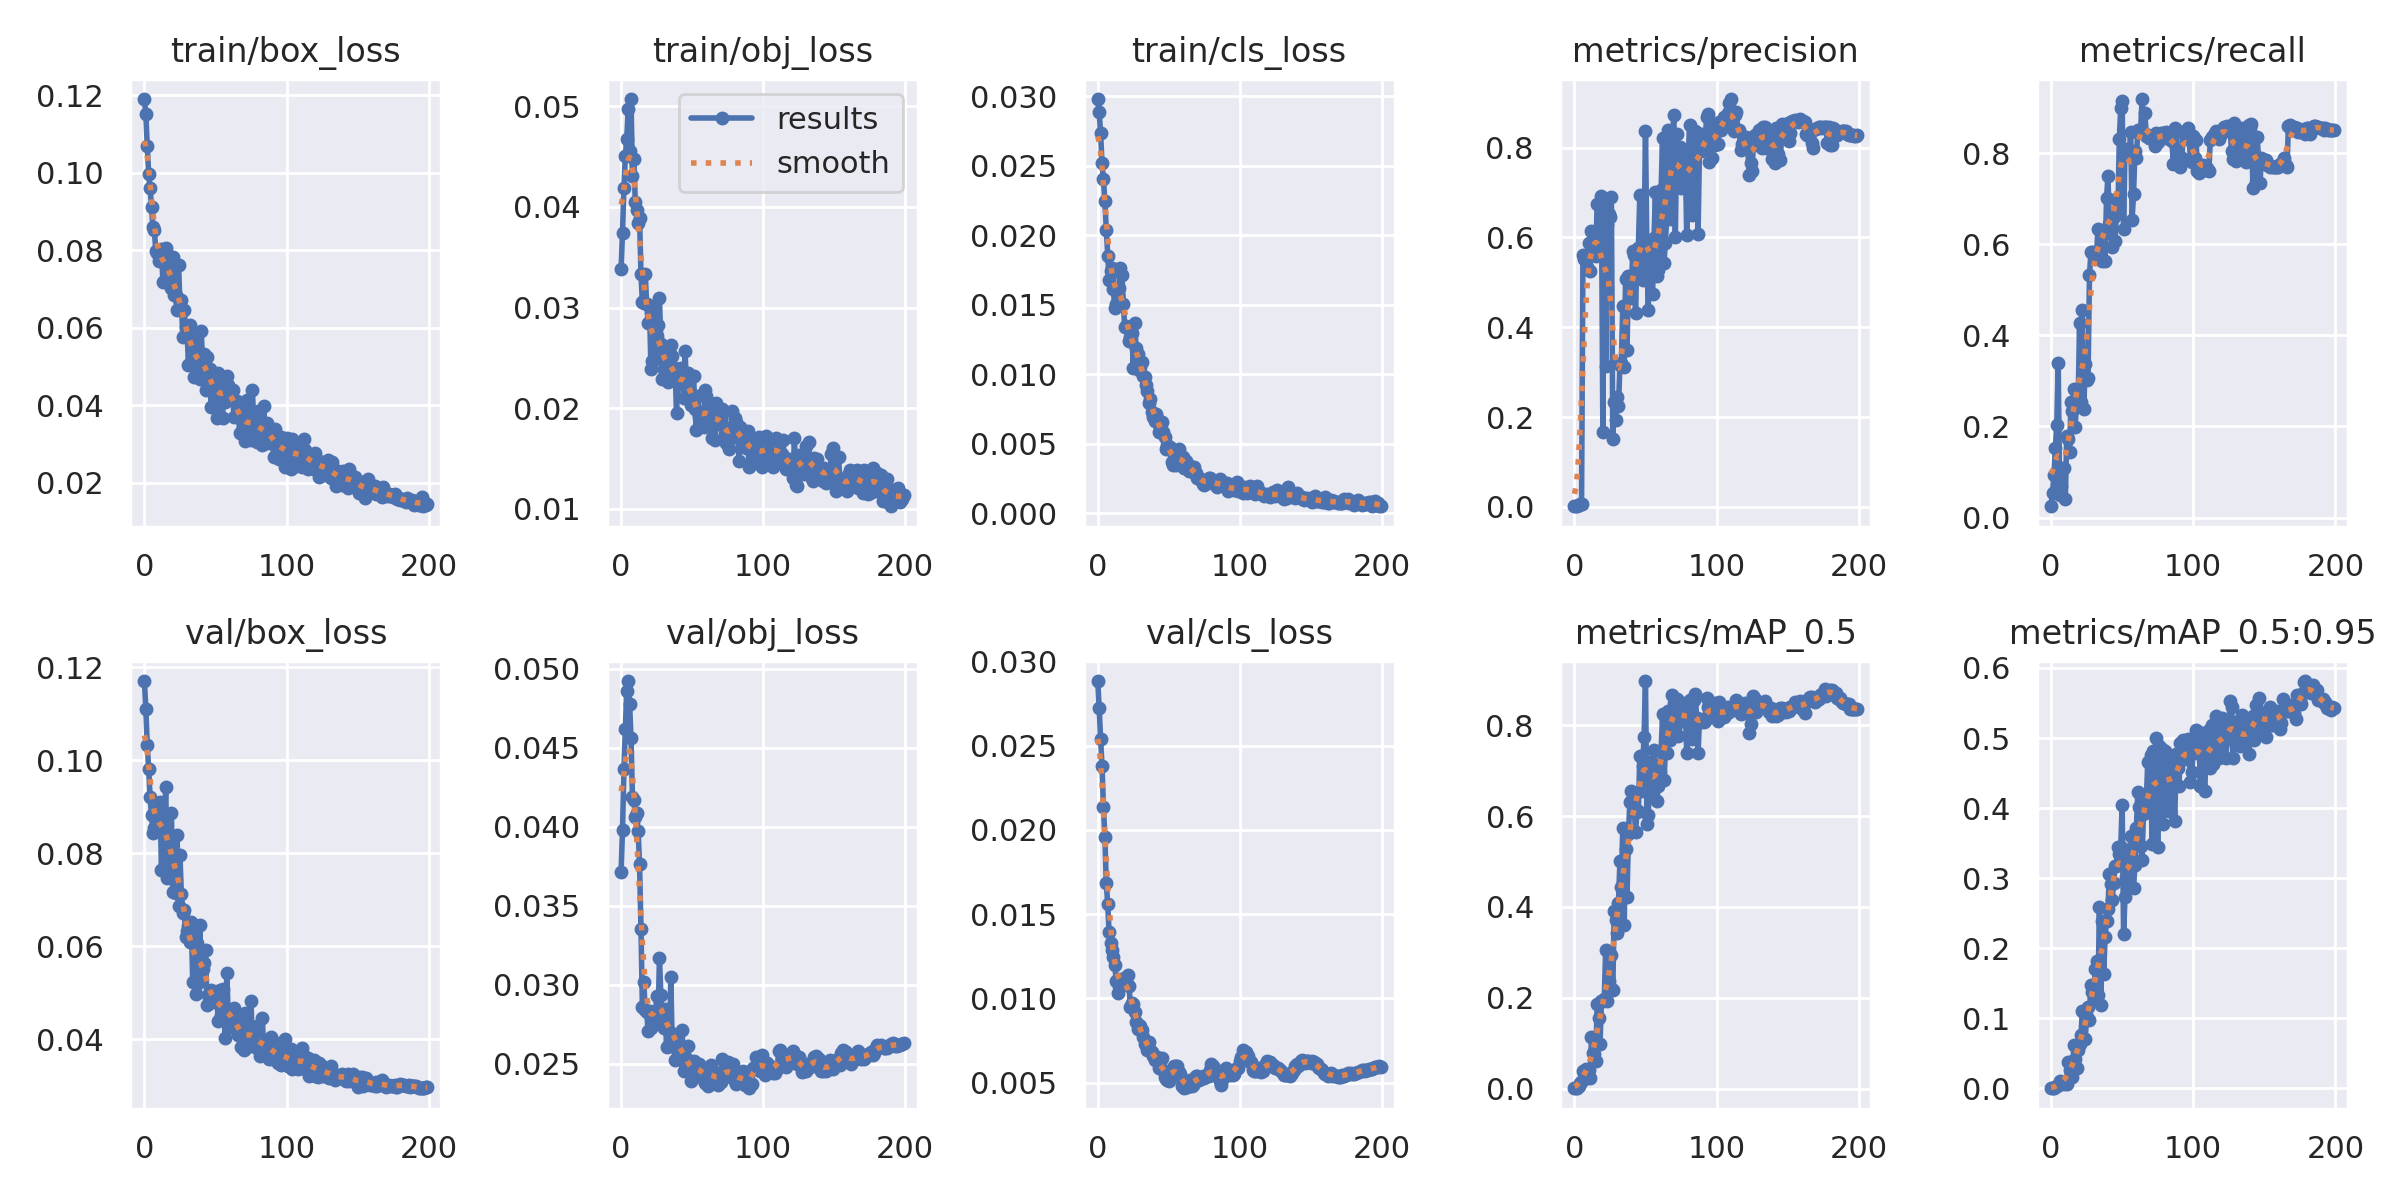

In [40]:
from IPython.display import Image

Image('/content/yolov5/runs/train/mask_yolov5_results5/results.png')

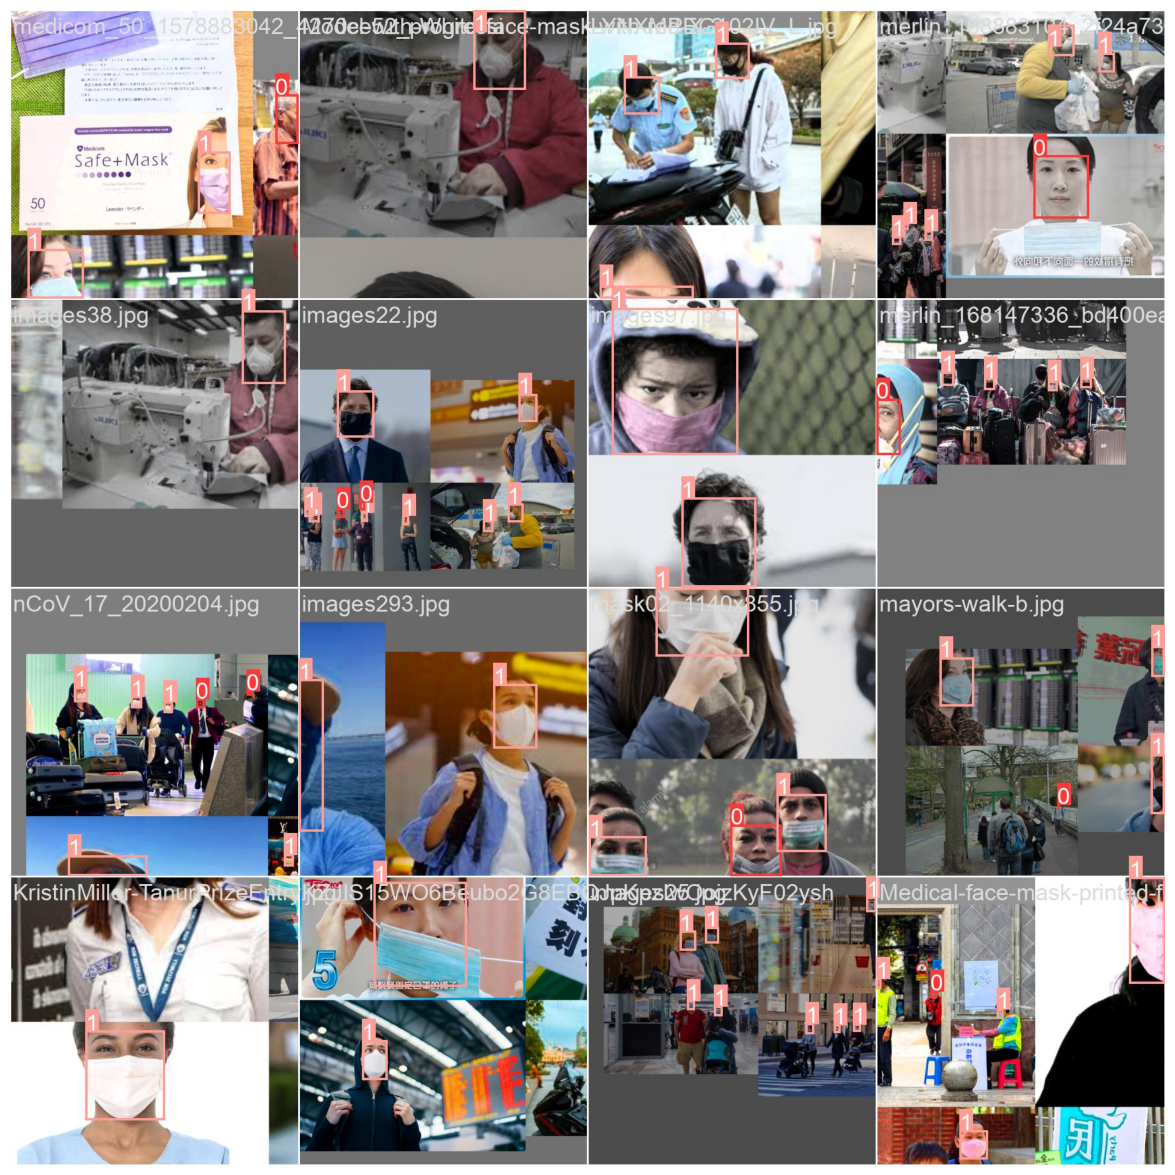

In [42]:
import matplotlib.pyplot as plt

img = plt.imread('/content/yolov5/runs/train/mask_yolov5_results5/train_batch0.jpg')

plt.figure(figsize = (20, 15))
plt.imshow(img)
plt.axis('off')
plt.show()

# Model Validation

In [43]:
!pwd

/content/yolov5


In [44]:
!python val.py --data /content/dataset/data.yaml --weights /content/yolov5/runs/train/mask_yolov5_results/weights/best.py --exist-ok

val: data=/content/dataset/data.yaml, weights=['/content/yolov5/runs/train/mask_yolov5_results/weights/best.py'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=True, half=False, dnn=False
YOLOv5 🚀 v7.0-227-ge4df1ec Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Traceback (most recent call last):
  File "/content/yolov5/val.py", line 411, in <module>
    main(opt)
  File "/content/yolov5/val.py", line 382, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File "/content/yolov5/val.py", line 143, in run
    model = DetectMultiBackend(weights, device=device, dnn=dnn, data=data, fp16=half)
  File "/content/yolov5/models/common.py", line 347, in __ini

# Model Test

In [45]:
!python detect.py --source /content/dataset/test --weights /content/yolov5/runs/train/mask_yolov5_results/weights/best.py --conf 0.5 --name Mask_Test --exist-ok --line-thickness 1

detect: weights=['/content/yolov5/runs/train/mask_yolov5_results/weights/best.py'], source=/content/dataset/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=Mask_Test, exist_ok=True, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-227-ge4df1ec Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Traceback (most recent call last):
  File "/content/yolov5/detect.py", line 285, in <module>
    main(opt)
  File "/content/yolov5/detect.py", line 280, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File "/content/yolov5/detect.py", line 101, in run
    mod

In [46]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/Mask_Test/*.jpg'):
  display(Image(filename=imageName))
  print('\n')

# Save Model to Google Drive

In [47]:
# from google.colab import drive
# drive.mount('/content/drive')

In [48]:
# cp -r /content/yolov5/runs/train/mask_yolov5_results /content/drive/MyDrive/Mask_yolov5